In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
dataset = pd.read_csv('Cardiovascular_Disease.csv')

In [3]:
#Defining independent variables in x and dependent variable (target) in y
x = dataset.iloc[:,:18].values
y = dataset.iloc[:,-1].values

In [4]:
#Checking for missing values
missing_values = dataset.isnull().sum()
print('Missing values count:', missing_values)

Missing values count: General_Health                  0
Checkup                         0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
Heart_Disease                   0
dtype: int64


In [5]:
#Applying Ordinal Encoding on the 1st column

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

encoded_column = oe.fit_transform(dataset[['General_Health']])
dataset['General_Health'] = encoded_column

#viewing the Ordinal Encoded values
dataset[['General_Health']].head(5)

,General_Health
0,3.0
1,4.0
2,4.0
3,3.0
4,2.0


In [6]:
#Applying Label Encoding on all the required columns
from sklearn.preprocessing import LabelEncoder

#Initializing and fitting LabelEncoder for required columns

columns_to_LabelEncode = ['Exercise','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Smoking_History']

encoded_columns = {}

for column in columns_to_LabelEncode:
    encoded_columns[column] = LabelEncoder().fit_transform(dataset[column])
    
#Updating the dataset with encoded values
for column in encoded_columns:
    dataset[column] = encoded_columns[column]
    
#Seperately handling the target (dependent) variable
target_column = 'Heart_Disease'
dataset[target_column] = LabelEncoder().fit_transform(dataset[target_column])

#Viewing the LabelEncoded data
dataset[['Exercise','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Smoking_History','Heart_Disease']].head(5)

,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,Heart_Disease
0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,1,0,0,0,1
2,1,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,1,0,1
4,0,0,0,0,0,0,1,1,0


In [7]:
#Applying One Hot Encoding on all the required columns
from sklearn.preprocessing import OneHotEncoder

columns_to_OneHotEncode = ['Checkup', 'Age_Category']

#Initializign the OneHotEncoder
ohencoder = OneHotEncoder(drop='first', sparse=False)

#Fitting and transforming the selected columns
encoded_columns = ohencoder.fit_transform(dataset[columns_to_OneHotEncode])

#Creating a new dataset with the encoded column
encoded_dataset = pd.DataFrame(encoded_columns, columns=ohencoder.get_feature_names_out(columns_to_OneHotEncode))

#Displaying the encoded data
print(encoded_dataset)

#Concatenating the original dataset with the encoded dataset
dataset = pd.concat([dataset, encoded_dataset], axis=1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


        Checkup_Never  Checkup_Within the past 2 years  \
0                 0.0                              1.0   
1                 0.0                              0.0   
2                 0.0                              0.0   
3                 0.0                              0.0   
4                 0.0                              0.0   
...               ...                              ...   
308849            0.0                              0.0   
308850            0.0                              0.0   
308851            0.0                              0.0   
308852            0.0                              0.0   
308853            0.0                              0.0   

        Checkup_Within the past 5 years  Checkup_Within the past year  \
0                                   0.0                           0.0   
1                                   0.0                           1.0   
2                                   0.0                           1.0   
3          

In [8]:
#Redefining independent and dependent variables by including the encoded data in independent variable
df1 = dataset.iloc[:,0]     # Considering 'General Health' column
df2 = dataset.iloc[:,2:9]   # Excluding 'Checkup' and 'Age Category' columns as they have categorical data 
df3 = dataset.iloc[:,12:18] # Excluding 'Height_(cm)', 'Weight_(kg)' columns as we have BMI column
df4 = dataset.iloc[:,19:-1] # Including all One Hot Encoded columns after the independent variable

x = pd.concat([df1, df2, df3, df4], axis=1)
y = dataset.iloc[:,18]
data = pd.concat([x, y], axis=1) # 'data' now consists of the cleaned and final data.

In [9]:
#Performing Feature Selection with Mutual Information
from sklearn.feature_selection import SelectKBest, mutual_info_classif

#Selecting the top k features based on mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=7)
x = selector.fit_transform(x, y) #Replacing the dependent variables with the top k features

#Getting the indices of selected features and their corresponding scores
selected_indices = selector.get_support(indices=True)
selected_scores = selector.scores_
print(data.columns[selected_indices])

Index(['General_Health', 'Exercise', 'Diabetes', 'Arthritis', 'Sex',
       'Smoking_History', 'Checkup_Within the past year'],
      dtype='object')


In [10]:
#Splitting data into Training Data and Testing Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [11]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier
# Create a DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Fit the model on the training data
tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

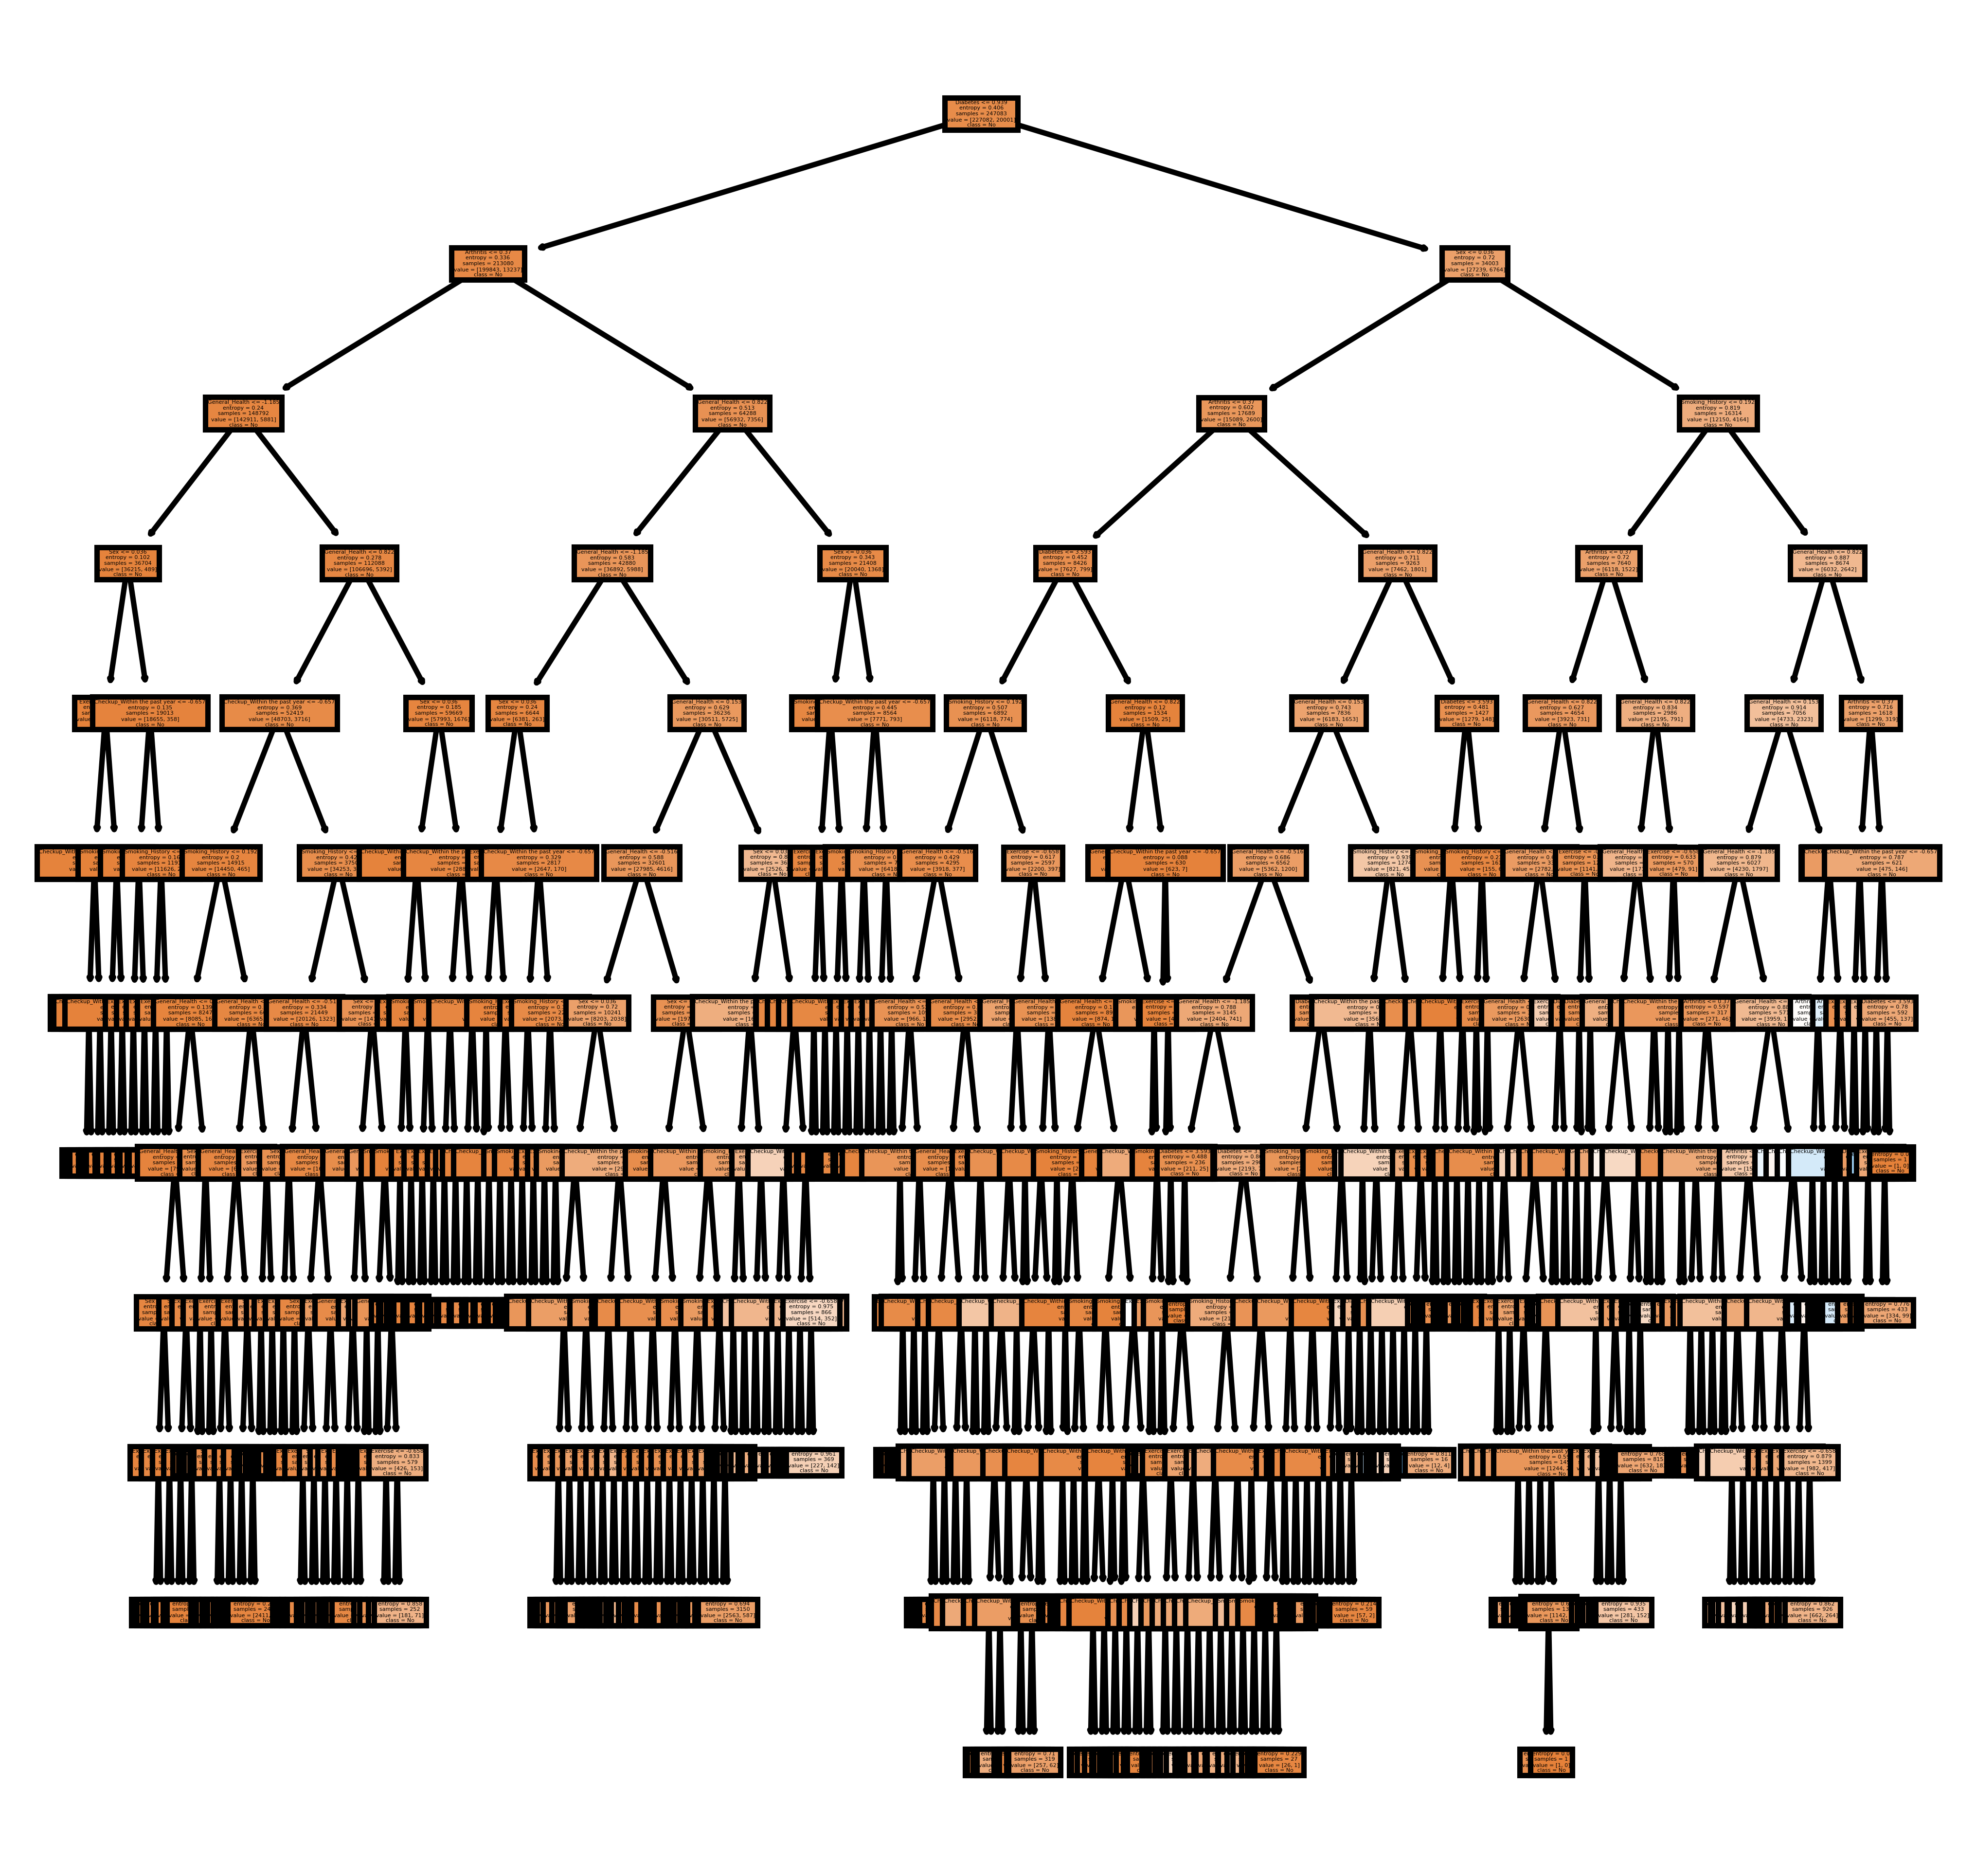

In [20]:
#Visualizing the tree
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6), dpi=800)
tree.plot_tree(tree_classifier, feature_names=data.columns[selected_indices], class_names=['No','Yes'], filled=True)
fig.savefig('DecisionTree_CVD_DTC.png')

In [21]:
#Predicting the results of the test set
y_pred = tree_classifier.predict(x_test)

In [22]:
#Calculating Accuracy Percent
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test, y_pred)
print('Accuracy percent: '+str(a*100)+'%')

Accuracy percent: 91.96062877402017%


In [23]:
#Calculating Precision Score
from sklearn.metrics import precision_score
p = precision_score(y_test, y_pred)
print(p)

0.5125


In [24]:
#Calculating Recall Score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.016498993963782696

In [25]:
#Calculating F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f1)

0.031968810916179334


In [26]:
#Obtaining the effective alphas and impurities on the training set 
path = tree_classifier.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

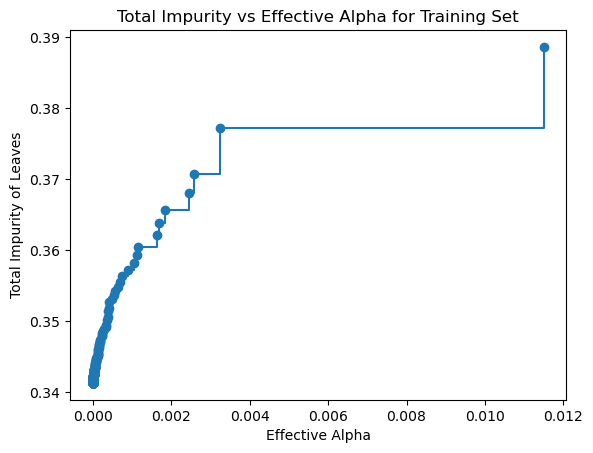

In [27]:
#Plotting Effective Alphas v/s Impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha for Training Set")
fig.savefig("ALvIMP.png")

In [28]:
#Setting the values of ccp_alpha in the classifier and fitting with training data
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

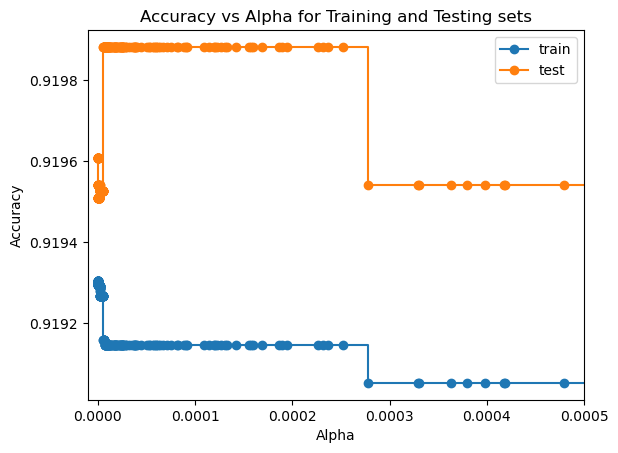

In [29]:
#Calculating the mean accuracy on the given data 
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

#Plotting Alpha v/s Accuracy
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha for Training and Testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
plt.xlim(-0.00001, 0.0005)  # Setting x-axis limits for better visualisation into the graph
ax.legend()
plt.show()
fig.savefig('ACCvAL.png')

In [30]:
from sklearn.tree import DecisionTreeClassifier
# Create a DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.0002)

# Fit the model on the training data
tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0002, criterion='entropy')

In [31]:
#Predicting the results of the test set
y_pred = tree_classifier.predict(x_test)

In [32]:
#Calculating Accuracy Percent
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test, y_pred)
print('Accuracy percent: '+str(a*100)+'%')

Accuracy percent: 91.98814977902252%


In [33]:
#Calculating Precision Score
from sklearn.metrics import precision_score
p = precision_score(y_test, y_pred)
print(p)

0.5399239543726235


In [34]:
#Calculating Recall Score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.02857142857142857

In [35]:
#Calculating F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f1)

0.05427097267341868


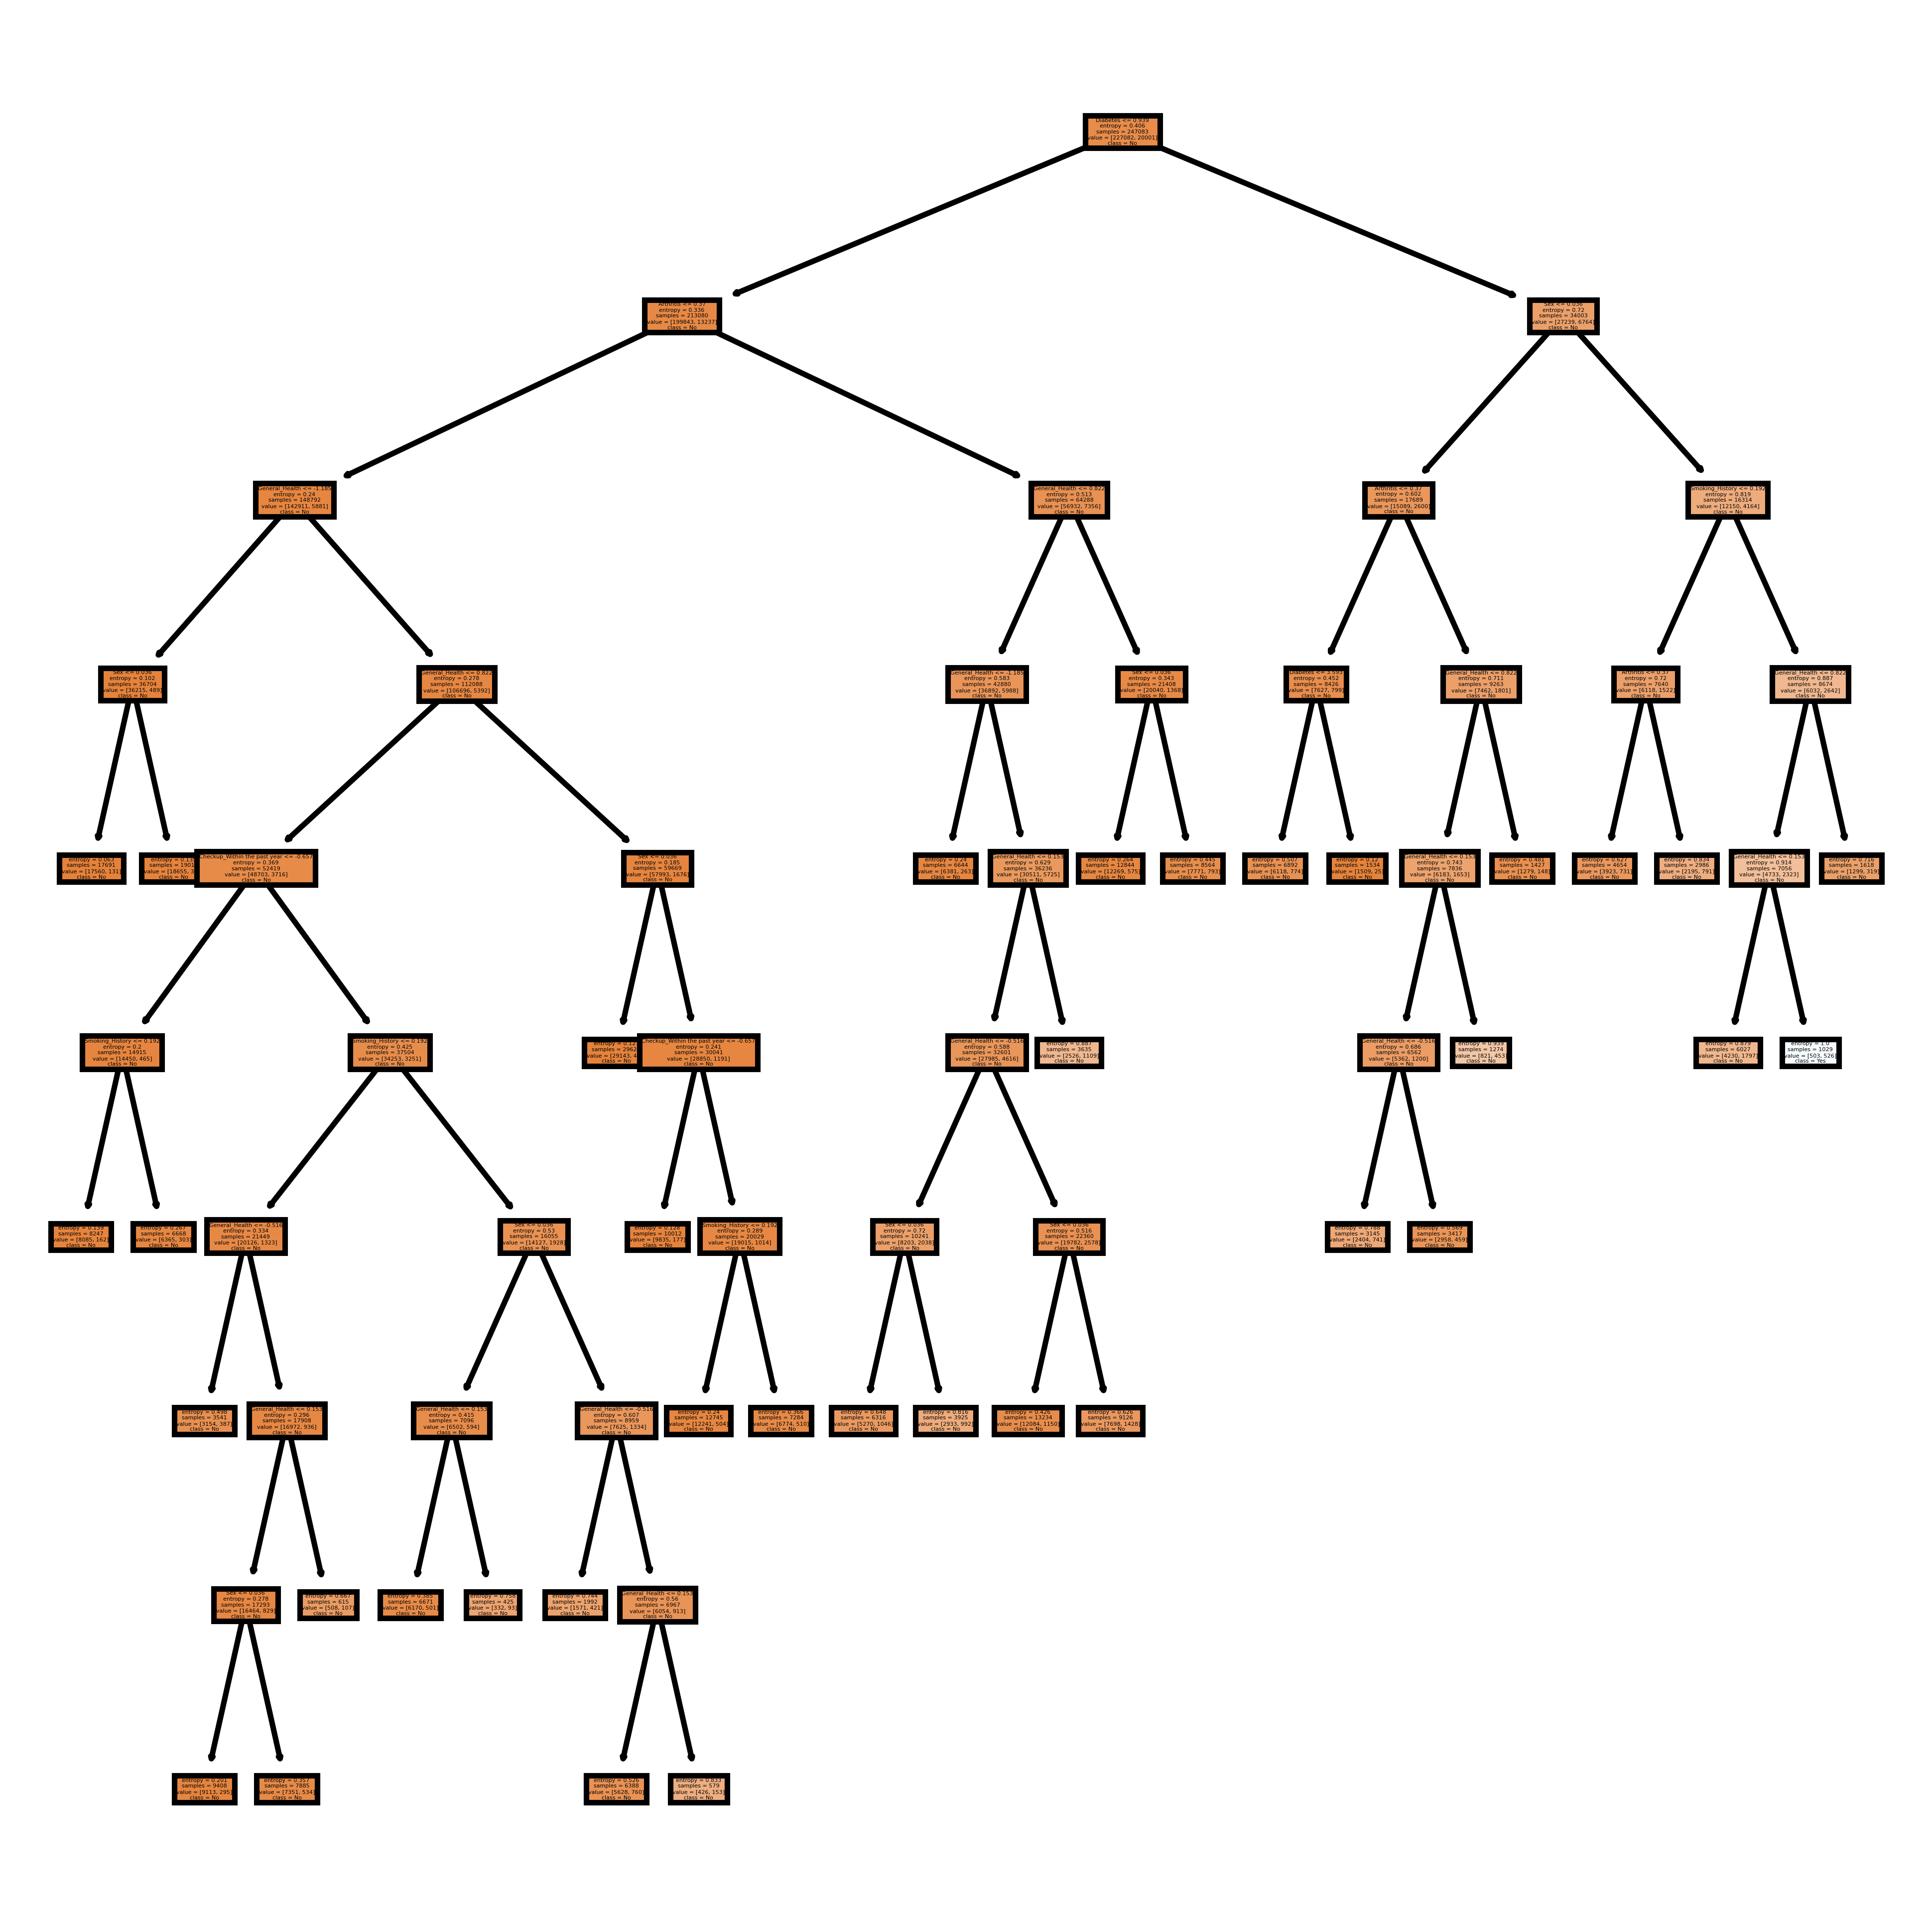

In [36]:
#Visualizing the tree post pruning
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6), dpi=800)
tree.plot_tree(tree_classifier, feature_names=data.columns[selected_indices], class_names=['No','Yes'], filled=True)
fig.savefig('DecisionTree_CVD_DTC_Pruning.png')